# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.spatial.distance import jensenshannon
from scipy.cluster.hierarchy import dendrogram, linkage

# CSV FILE SELECTION

In [37]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()


# DATA LOADING AND PREPROCESSING

In [38]:
# Load Dataset
data = pd.read_csv(file_path
)

# droping the story id column
X = data.drop('Story_ID', axis=1)

data.head()

,Story_ID,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,Story_1,1,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,1,1,1,0
1,Story_2,1,0,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,1,1,0
2,Story_3,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
3,Story_4,1,0,1,1,0,0,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,Story_5,0,1,1,0,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [39]:
data.describe()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.600000,0.550000,0.600000,0.450000,0.65000,0.600000,0.500000,0.400000,0.35000,0.550000,...,0.35000,0.450000,0.500000,0.500000,0.35000,0.250000,0.400000,0.800000,0.65000,0.500000
std,0.502625,0.510418,0.502625,0.510418,0.48936,0.502625,0.512989,0.502625,0.48936,0.510418,...,0.48936,0.510418,0.512989,0.512989,0.48936,0.444262,0.502625,0.410391,0.48936,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.500000,0.000000,0.00000,1.000000,...,0.00000,0.000000,0.500000,0.500000,0.00000,0.000000,0.000000,1.000000,1.00000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,0.250000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Story_ID   20 non-null     object
 1   Push_1     20 non-null     int64 
 2   Push_2     20 non-null     int64 
 3   Push_3     20 non-null     int64 
 4   Push_4     20 non-null     int64 
 5   Push_5     20 non-null     int64 
 6   Push_6     20 non-null     int64 
 7   Push_7     20 non-null     int64 
 8   Push_8     20 non-null     int64 
 9   Push_9     20 non-null     int64 
 10  Push_10    20 non-null     int64 
 11  Push_11    20 non-null     int64 
 12  Pull_1     20 non-null     int64 
 13  Pull_2     20 non-null     int64 
 14  Pull_3     20 non-null     int64 
 15  Pull_4     20 non-null     int64 
 16  Pull_5     20 non-null     int64 
 17  Pull_6     20 non-null     int64 
 18  Pull_7     20 non-null     int64 
 19  Pull_8     20 non-null     int64 
 20  Anxiety_1  20 non-null     int64 


In [41]:
X

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,1,0,0,0,1,0,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
1,1,0,0,0,1,0,1,0,1,1,...,0,1,1,1,1,1,0,1,1,0
2,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,1,1,0
3,1,0,1,1,0,0,1,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
5,1,1,1,0,1,1,0,1,1,1,...,0,1,1,0,0,0,0,1,0,1
6,0,1,1,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,1
8,0,1,0,0,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,1,1
9,1,0,1,1,0,1,1,1,0,0,...,1,0,0,1,0,0,1,1,1,0


# INITIAL SCATTER PLOT

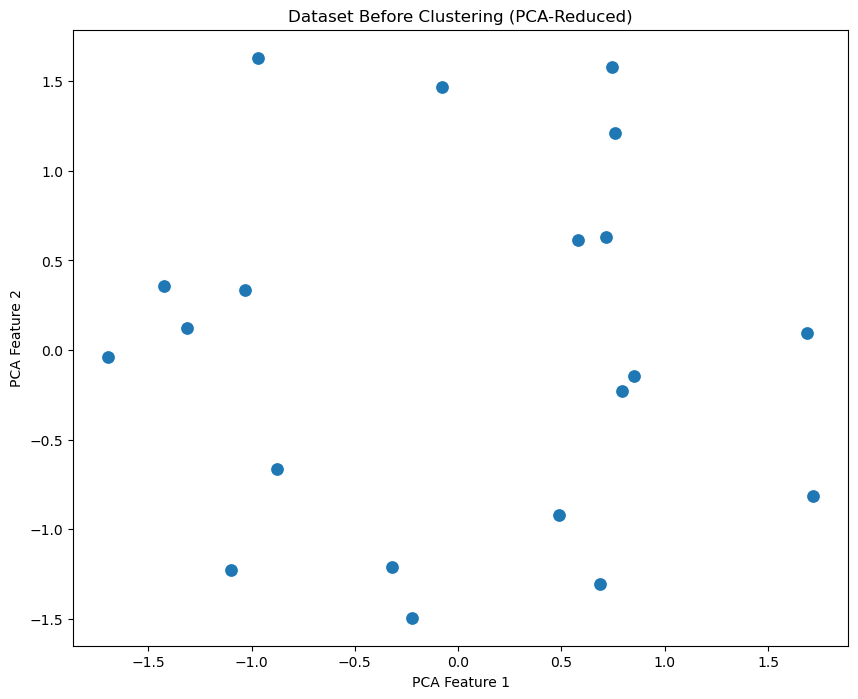

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=100)
plt.title("Dataset Before Clustering (PCA-Reduced)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

# SELECTING THE BEST VALUE FOR K

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

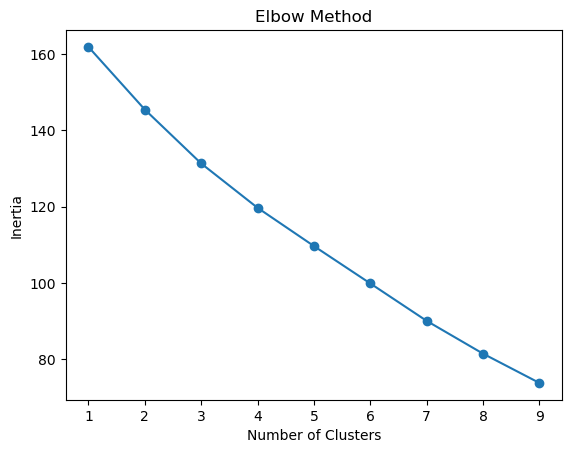

In [43]:
def elbow_method():
    distortions = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, 10), distortions, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()
    return distortions
distortions = elbow_method()

# K Means Clustering 

In [44]:
def k_means(x):
    k = 4  # Define the number of clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(x)
    return labels, kmeans


# SCATTER PLOT AFTER CLUSTERING IS APPLIED

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


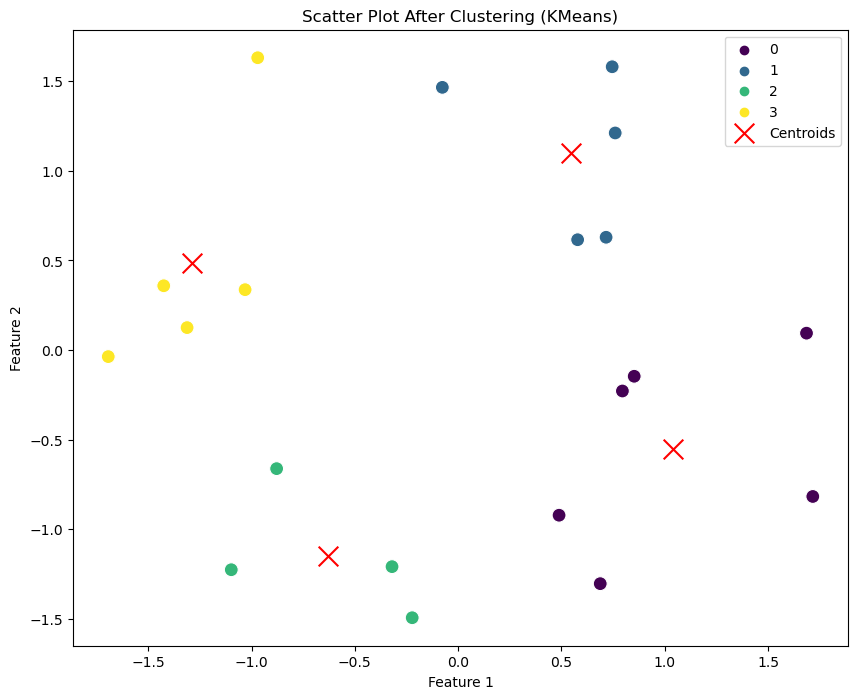

In [45]:
labels, kmeans= k_means(X_pca)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("Scatter Plot After Clustering (KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_11444\2486770150.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix)


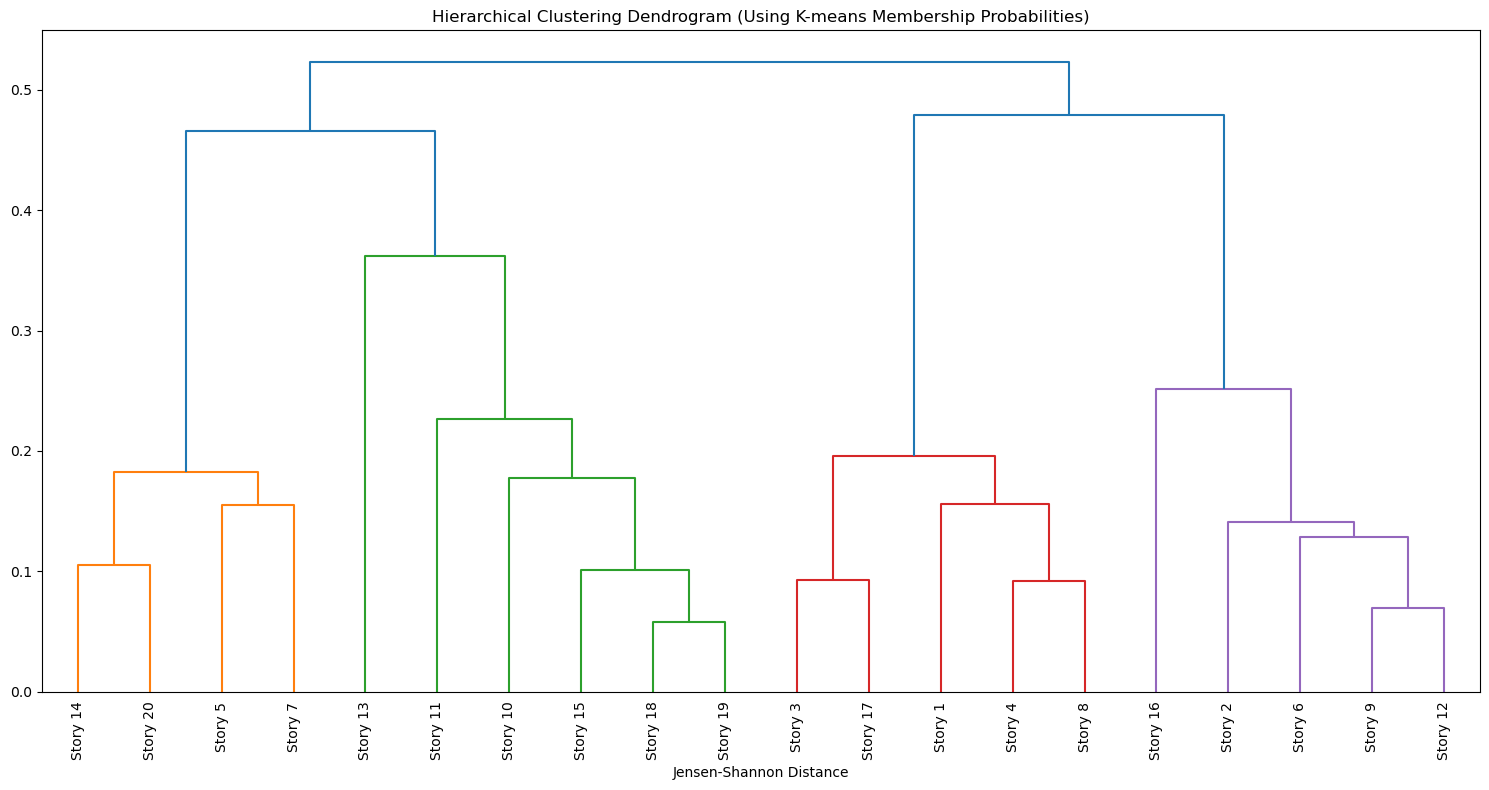

In [46]:
labels, kmeans= k_means(X)

# Compute distances from each story to centroids
distances = kmeans.transform(X)

# Convert distances to probabilities (softmax)
probabilities = np.exp(-distances) / np.sum(np.exp(-distances), axis=1, keepdims=True)

# Step 2: Compute pairwise Jensen-Shannon divergence matrix
n = len(X)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = jensenshannon(probabilities[i], probabilities[j])

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix)

# Step 4: Plot dendrogram with Story_ID labels
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in range(len(X))], leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Using K-means Membership Probabilities)')
plt.xlabel('Jensen-Shannon Distance')
plt.tight_layout()
plt.show()

# EVALUATION

In [36]:
# Evaluate clustering performance
if len(set(labels)) > 1:  # Ensure more than one cluster exists
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)    
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

print("Evaluation Metrics On Dataset without Resistance Forces:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Evaluation Metrics On Dataset without Resistance Forces:
Silhouette Score: 0.05189997627002043
Calinski-Harabasz Score: 1.8623024830699777
Davies-Bouldin Score: 1.823297306201363
